## Importation des données
Nous importons les données du fichier CSV et affichons les types de données pour comprendre la structure du jeu de données.

In [1]:
import pandas as pd
data = pd.read_csv("C:\\Users\\AZIZ\\OneDrive\\Images\\IBM data science\\Cours 7\\Module 5\\kc_house_data.csv")
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## Résumé statistique des données
Nous utilisons la fonction describe() pour obtenir un résumé statistique des colonnes numériques

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Suppression de colonnes inutiles
Pour simplifier le jeu de données, nous supprimons la colonne id, qui n'est pas utile pour les analyses.

In [4]:
data.drop(columns=["id"], inplace=True)
print(data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

## Comptage des maisons par nombre d'étages
Nous comptons les occurrences uniques dans la colonne floors et convertissons le résultat en DataFrame.

In [5]:
floor_counts = data["floors"].value_counts().to_frame()
print(floor_counts)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


## Boxplot des prix en fonction de la vue sur le front de mer
Nous utilisons un boxplot pour visualiser si les maisons avec vue sur le front de mer (waterfront) ont des prix différents et plus d'outliers.

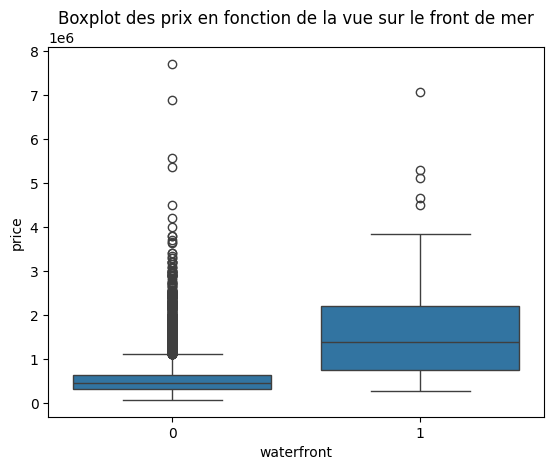

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="waterfront", y="price", data=data)
plt.title("Boxplot des prix en fonction de la vue sur le front de mer")
plt.show()

 ## Corrélation entre sqft_above et le prix
Nous utilisons regplot pour examiner la relation entre la surface habitable au-dessus du sous-sol (sqft_above) et le prix des maisons.

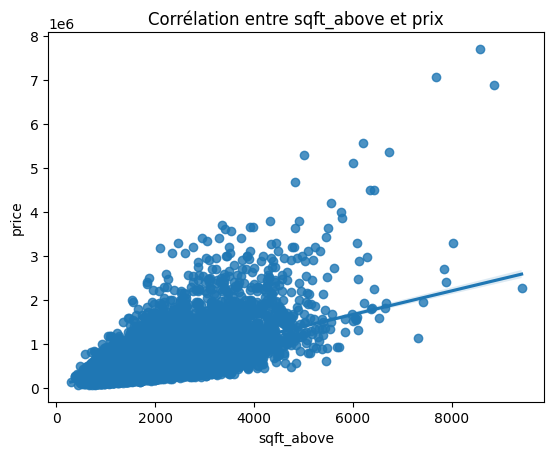

In [7]:
sns.regplot(x="sqft_above", y="price", data=data)
plt.title("Corrélation entre sqft_above et prix")
plt.show()

## Régression linéaire pour prédire le prix à partir de sqft_living
Nous utilisons un modèle de régression linéaire pour prédire les prix en fonction de la surface habitable totale.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[["sqft_living"]]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² pour sqft_living :", r2)


R² pour sqft_living : 0.49406905389089006


## Régression multivariée avec plusieurs caractéristiques
Nous utilisons un ensemble de plusieurs caractéristiques pour améliorer le modèle de régression.

In [9]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = data[features]
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² pour les caractéristiques multiples :", r2)

R² pour les caractéristiques multiples : 0.6615003078951851


## Pipeline pour régression polynomiale
Nous créons un pipeline avec un standardiseur, une transformation polynomiale et une régression linéaire pour améliorer les prédictions.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² avec pipeline :", r2)

R² avec pipeline : 0.7114682256355127


## Régression Ridge
Pour mieux contrôler le surapprentissage, nous utilisons une régression Ridge avec une pénalisation 𝛼=0.1.
Nous entraînons le modèle sur l'ensemble d'entraînement et calculons le R² sur les données de test.

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² pour Ridge :", r2)

R² pour Ridge : 0.6614734596866666


## Régression Ridge avec transformation polynomiale
Pour améliorer les performances, nous appliquons une transformation polynomiale de degré 2 sur les données d'entrée avant d'entraîner une régression Ridge.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)
y_pred = ridge.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
print("R² pour Ridge avec transformation polynomiale :", r2)

R² pour Ridge avec transformation polynomiale : 0.7003486872313182


### À propos de l'auteur

---

🌟 **Projet réalisé par : [Abdoul Aziz Gueye]** 🌟  
📚 **Étudiant en Master :** Intelligence Artificielle et Big Data  
💡 **Passionné par :** La science des données, l'intelligence artificielle, et la création de projets innovants et amusants.  

📫 **Contact :** [aziznjr420@gmail.com]  

---